In [ ]:
# pip install seaborn

In [7]:
# pip install xlrd==1.2.0
# Do no change the xlrd version ,<Prashant>

     |████████████████████████████████| 103 kB 8.4 MB/s eta 0:00:01
  Attempting uninstall: xlrd
    Found existing installation: xlrd 2.0.1
    Uninstalling xlrd-2.0.1:
      Successfully uninstalled xlrd-2.0.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# pip install matplotlib

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [60]:
train_data = pd.read_excel(r"aviation_pax_fare_train.xlsx")

In [61]:
pd.set_option('display.max_columns', None)

In [62]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Scoot,24/03/2019,Jakarta,Singapore,CGK → SIN,22:20,01:10 22 Mar,2h 50m,non-stop,No info,260
1,Jetstar Asia,1/05/2019,Bangkok,Jakarta,BKK → BWN → VTE → CGK,05:50,13:15,7h 25m,2 stops,No info,511
2,Silk Air,9/06/2019,Singapore,Bali Denpasar,SIN → PNH → KUL → DPS,09:25,04:25 10 Jun,19h,2 stops,No info,926
3,Scoot,12/05/2019,Bangkok,Jakarta,BKK → SUB → CGK,18:05,23:30,5h 25m,1 stop,No info,415
4,Scoot,01/03/2019,Jakarta,Singapore,CGK → SUB → SIN,16:50,21:35,4h 45m,1 stop,No info,887


In [63]:
train_data.shape

(10683, 11)

In [64]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [65]:
# As per above data info , Price is dependent feature and others are independant feature.

In [66]:
train_data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
35h 35m      1
29h 30m      1
32h 55m      1
3h 25m       1
30h 10m      1
Name: Duration, Length: 368, dtype: int64

In [67]:
train_data.dropna(inplace = True)

In [68]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [69]:
train_data.shape

(10682, 11)

---

## The Aviation data in the current state is not ready for the model & hence requires to some Data analysis i.e EDA

In [70]:
# There are features in the data which needs to be converted to computable format. Example: Date_of_Journey will be 
#split to day and month with datetime data type. This is done using pandas to_datetime.

In [71]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [72]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [73]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,Scoot,24/03/2019,Jakarta,Singapore,CGK → SIN,22:20,01:10 22 Mar,2h 50m,non-stop,No info,260,24,3
1,Jetstar Asia,1/05/2019,Bangkok,Jakarta,BKK → BWN → VTE → CGK,05:50,13:15,7h 25m,2 stops,No info,511,1,5
2,Silk Air,9/06/2019,Singapore,Bali Denpasar,SIN → PNH → KUL → DPS,09:25,04:25 10 Jun,19h,2 stops,No info,926,9,6
3,Scoot,12/05/2019,Bangkok,Jakarta,BKK → SUB → CGK,18:05,23:30,5h 25m,1 stop,No info,415,12,5
4,Scoot,01/03/2019,Jakarta,Singapore,CGK → SUB → SIN,16:50,21:35,4h 45m,1 stop,No info,887,1,3


In [74]:
#Droping Date_of_Journey.

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [75]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,Scoot,Jakarta,Singapore,CGK → SIN,22:20,01:10 22 Mar,2h 50m,non-stop,No info,260,24,3
1,Jetstar Asia,Bangkok,Jakarta,BKK → BWN → VTE → CGK,05:50,13:15,7h 25m,2 stops,No info,511,1,5
2,Silk Air,Singapore,Bali Denpasar,SIN → PNH → KUL → DPS,09:25,04:25 10 Jun,19h,2 stops,No info,926,9,6
3,Scoot,Bangkok,Jakarta,BKK → SUB → CGK,18:05,23:30,5h 25m,1 stop,No info,415,12,5
4,Scoot,Jakarta,Singapore,CGK → SUB → SIN,16:50,21:35,4h 45m,1 stop,No info,887,1,3


In [76]:
# Departure time is when a plane leaves the terminal and starts the journey and here we split time using hours,min.

train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute


In [77]:
#Dropping Departure_time

train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [78]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,Scoot,Jakarta,Singapore,CGK → SIN,01:10 22 Mar,2h 50m,non-stop,No info,260,24,3,22,20
1,Jetstar Asia,Bangkok,Jakarta,BKK → BWN → VTE → CGK,13:15,7h 25m,2 stops,No info,511,1,5,5,50
2,Silk Air,Singapore,Bali Denpasar,SIN → PNH → KUL → DPS,04:25 10 Jun,19h,2 stops,No info,926,9,6,9,25
3,Scoot,Bangkok,Jakarta,BKK → SUB → CGK,23:30,5h 25m,1 stop,No info,415,12,5,18,5
4,Scoot,Jakarta,Singapore,CGK → SUB → SIN,21:35,4h 45m,1 stop,No info,887,1,3,16,50


In [79]:
#Similarl to departure time ,the same applies to Arrival time as well.


train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour


train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute


In [80]:
#Dropping Arrival Time.
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [81]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Scoot,Jakarta,Singapore,CGK → SIN,2h 50m,non-stop,No info,260,24,3,22,20,1,10
1,Jetstar Asia,Bangkok,Jakarta,BKK → BWN → VTE → CGK,7h 25m,2 stops,No info,511,1,5,5,50,13,15
2,Silk Air,Singapore,Bali Denpasar,SIN → PNH → KUL → DPS,19h,2 stops,No info,926,9,6,9,25,4,25
3,Scoot,Bangkok,Jakarta,BKK → SUB → CGK,5h 25m,1 stop,No info,415,12,5,18,5,23,30
4,Scoot,Jakarta,Singapore,CGK → SUB → SIN,4h 45m,1 stop,No info,887,1,3,16,50,21,35


In [82]:
#Duration format need to be changed to hours and minutes.This is done using List.In the list we check whether 
#hours nad minutes exist .


duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]           

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   

In [83]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [84]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [85]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Scoot,Jakarta,Singapore,CGK → SIN,non-stop,No info,260,24,3,22,20,1,10,2,50
1,Jetstar Asia,Bangkok,Jakarta,BKK → BWN → VTE → CGK,2 stops,No info,511,1,5,5,50,13,15,7,25
2,Silk Air,Singapore,Bali Denpasar,SIN → PNH → KUL → DPS,2 stops,No info,926,9,6,9,25,4,25,19,0
3,Scoot,Bangkok,Jakarta,BKK → SUB → CGK,1 stop,No info,415,12,5,18,5,23,30,5,25
4,Scoot,Jakarta,Singapore,CGK → SUB → SIN,1 stop,No info,887,1,3,16,50,21,35,4,45


---

In [86]:
# As Airline is Categorical Date and there is no rank within the categorization we apply one hot encoder 
# on the below features, prashant

# Airline
# Source
# Destination

In [87]:
train_data["Airline"].value_counts()

Silk Air                              3849
Scoot                                 2053
Jetstar Asia                          1751
Multiple carriers                     1196
ScootBiz                               818
Singapore Airlines                     479
Air Asia                               319
Malaysia Airlines                      194
Multiple carriers Premium economy       13
Singapore Airlines Business              6
Singapore Airlines Premium Economy       3
Malindo Air                              1
Name: Airline, dtype: int64

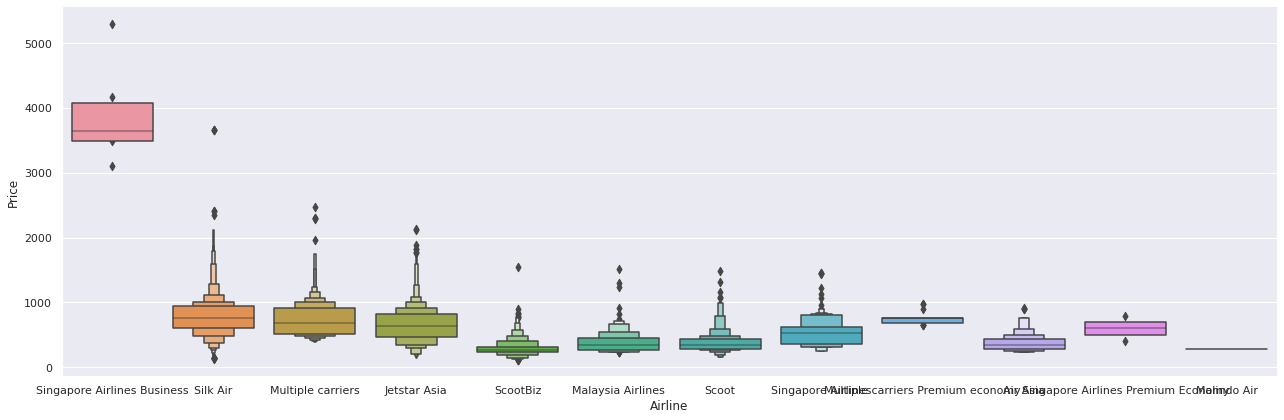

In [88]:

# Plotting the airline categorical i.e airline vs price data we see that Singapore airlines Business has the highest price and others
# all are within the median range.

sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [89]:
# As Singapore airlines business is the highest ranked in the abvoe graph we can try to apply Singapore airlines business as a ranked vairable against all other and perform
# ordinal encoding.Prashant

In [90]:
# One hot ecoding on Airline with dummy viarbale assignment.

Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Jetstar Asia,Airline_Malaysia Airlines,Airline_Malindo Air,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_Scoot,Airline_ScootBiz,Airline_Silk Air,Airline_Singapore Airlines,Airline_Singapore Airlines Business,Airline_Singapore Airlines Premium Economy
0,0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0


In [91]:
train_data["Source"].value_counts()

Singapore       4536
Bangkok         2871
Jakarta         2197
Kuala Lumpur     697
Hanoi            381
Name: Source, dtype: int64

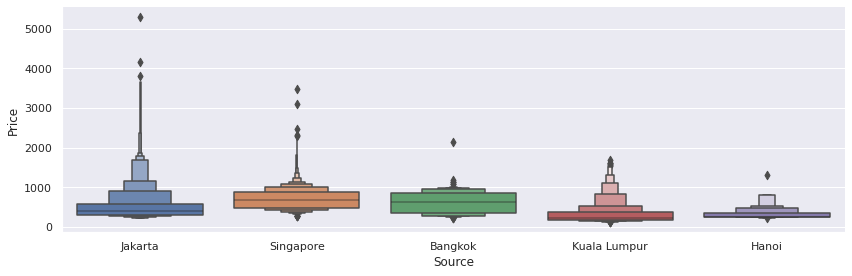

In [92]:
# Similarly Plotting Price and source 

sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [93]:
#One hot encoding of source using dummy assignment

Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Hanoi,Source_Jakarta,Source_Kuala Lumpur,Source_Singapore
0,0,1,0,0
1,0,0,0,0
2,0,0,0,1
3,0,0,0,0
4,0,1,0,0


In [94]:
train_data["Destination"].value_counts()

Bali Denpasar    4536
Jakarta          2871
Singapore        2197
Phuket            697
Bangkok           381
Name: Destination, dtype: int64

In [95]:
# Destination One hot encoding.

Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Bangkok,Destination_Jakarta,Destination_Phuket,Destination_Singapore
0,0,0,0,1
1,0,1,0,0
2,0,0,0,0
3,0,1,0,0
4,0,0,0,1


In [96]:
train_data["Route"]

0                    CGK → SIN
1        BKK → BWN → VTE → CGK
2        SIN → PNH → KUL → DPS
3              BKK → SUB → CGK
4              CGK → SUB → SIN
                 ...          
10678                BKK → CGK
10679                BKK → CGK
10680                CGK → SIN
10681                CGK → SIN
10682    SIN → AOR → KUL → DPS
Name: Route, Length: 10682, dtype: object

In [97]:
# Route and Additional_Info can be dropped and not related.

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [98]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [99]:
# Total_Stops can be seen as Ranked data and therefore we can apply ordinal categorical encoding.
# Assign increasing order keys to each data of total_stops.

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [100]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Scoot,Jakarta,Singapore,0,260,24,3,22,20,1,10,2,50
1,Jetstar Asia,Bangkok,Jakarta,2,511,1,5,5,50,13,15,7,25
2,Silk Air,Singapore,Bali Denpasar,2,926,9,6,9,25,4,25,19,0
3,Scoot,Bangkok,Jakarta,1,415,12,5,18,5,23,30,5,25
4,Scoot,Jakarta,Singapore,1,887,1,3,16,50,21,35,4,45


In [101]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [102]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Jetstar Asia,Airline_Malaysia Airlines,Airline_Malindo Air,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_Scoot,Airline_ScootBiz,Airline_Silk Air,Airline_Singapore Airlines,Airline_Singapore Airlines Business,Airline_Singapore Airlines Premium Economy,Source_Hanoi,Source_Jakarta,Source_Kuala Lumpur,Source_Singapore,Destination_Bangkok,Destination_Jakarta,Destination_Phuket,Destination_Singapore
0,Scoot,Jakarta,Singapore,0,260,24,3,22,20,1,10,2,50,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
1,Jetstar Asia,Bangkok,Jakarta,2,511,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Silk Air,Singapore,Bali Denpasar,2,926,9,6,9,25,4,25,19,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,Scoot,Bangkok,Jakarta,1,415,12,5,18,5,23,30,5,25,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Scoot,Jakarta,Singapore,1,887,1,3,16,50,21,35,4,45,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1


In [103]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [104]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Jetstar Asia,Airline_Malaysia Airlines,Airline_Malindo Air,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_Scoot,Airline_ScootBiz,Airline_Silk Air,Airline_Singapore Airlines,Airline_Singapore Airlines Business,Airline_Singapore Airlines Premium Economy,Source_Hanoi,Source_Jakarta,Source_Kuala Lumpur,Source_Singapore,Destination_Bangkok,Destination_Jakarta,Destination_Phuket,Destination_Singapore
0,0,260,24,3,22,20,1,10,2,50,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
1,2,511,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2,926,9,6,9,25,4,25,19,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,1,415,12,5,18,5,23,30,5,25,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,887,1,3,16,50,21,35,4,45,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1


In [105]:
data_train.shape

(10682, 29)

---

## Test set

In [106]:
test_data = pd.read_excel(r"aviation_pax_fare_test.xlsx")

In [107]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Silk Air,6/06/2019,Singapore,Bali Denpasar,SIN → KUL → DPS,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,Scoot,12/05/2019,Bangkok,Jakarta,BKK → HAN → CGK,06:20,10:20,4h,1 stop,No info
2,Silk Air,21/05/2019,Singapore,Bali Denpasar,SIN → KUL → DPS,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Singapore,Bali Denpasar,SIN → KUL → DPS,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Jakarta,Singapore,CGK → SIN,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# To Avoid DATA LEAKAGE we use different set of test data & train data .

In [108]:
# Preprocessing of test data similary to train data 

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]           

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)



Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [109]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Jetstar Asia,Malaysia Airlines,Multiple carriers,Multiple carriers Premium economy,Scoot,ScootBiz,Silk Air,Singapore Airlines,Singapore Airlines Business,Singapore Airlines Premium Economy,Hanoi,Jakarta,Kuala Lumpur,Singapore,Bangkok,Jakarta,Phuket,Singapore
0,1,6,6,17,30,4,25,10,55,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


---

# We can decide the best possible feature using some of the graphical tools 

# such heatmap,sklearn ExtraTreesRegressor

# feature importance .


In [110]:
data_train.shape

(10682, 29)

In [111]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Jetstar Asia', 'Airline_Malaysia Airlines',
       'Airline_Malindo Air', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_Scoot',
       'Airline_ScootBiz', 'Airline_Silk Air', 'Airline_Singapore Airlines',
       'Airline_Singapore Airlines Business',
       'Airline_Singapore Airlines Premium Economy', 'Source_Hanoi',
       'Source_Jakarta', 'Source_Kuala Lumpur', 'Source_Singapore',
       'Destination_Bangkok', 'Destination_Jakarta', 'Destination_Phuket',
       'Destination_Singapore'],
      dtype='object')

In [112]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Jetstar Asia', 'Airline_Malaysia Airlines',
       'Airline_Malindo Air', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_Scoot',
       'Airline_ScootBiz', 'Airline_Silk Air', 'Airline_Singapore Airlines',
       'Airline_Singapore Airlines Business',
       'Airline_Singapore Airlines Premium Economy', 'Source_Hanoi',
       'Source_Jakarta', 'Source_Kuala Lumpur', 'Source_Singapore',
       'Destination_Bangkok', 'Destination_Jakarta', 'Destination_Phuket',
       'Destination_Singapore']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Jetstar Asia,Airline_Malaysia Airlines,Airline_Malindo Air,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_Scoot,Airline_ScootBiz,Airline_Silk Air,Airline_Singapore Airlines,Airline_Singapore Airlines Business,Airline_Singapore Airlines Premium Economy,Source_Hanoi,Source_Jakarta,Source_Kuala Lumpur,Source_Singapore,Destination_Bangkok,Destination_Jakarta,Destination_Phuket,Destination_Singapore
0,0,24,3,22,20,1,10,2,50,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,1,3,16,50,21,35,4,45,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1


In [113]:
y = data_train.iloc[:, 1]
y.head()

0    260
1    511
2    926
3    415
4    887
Name: Price, dtype: int64

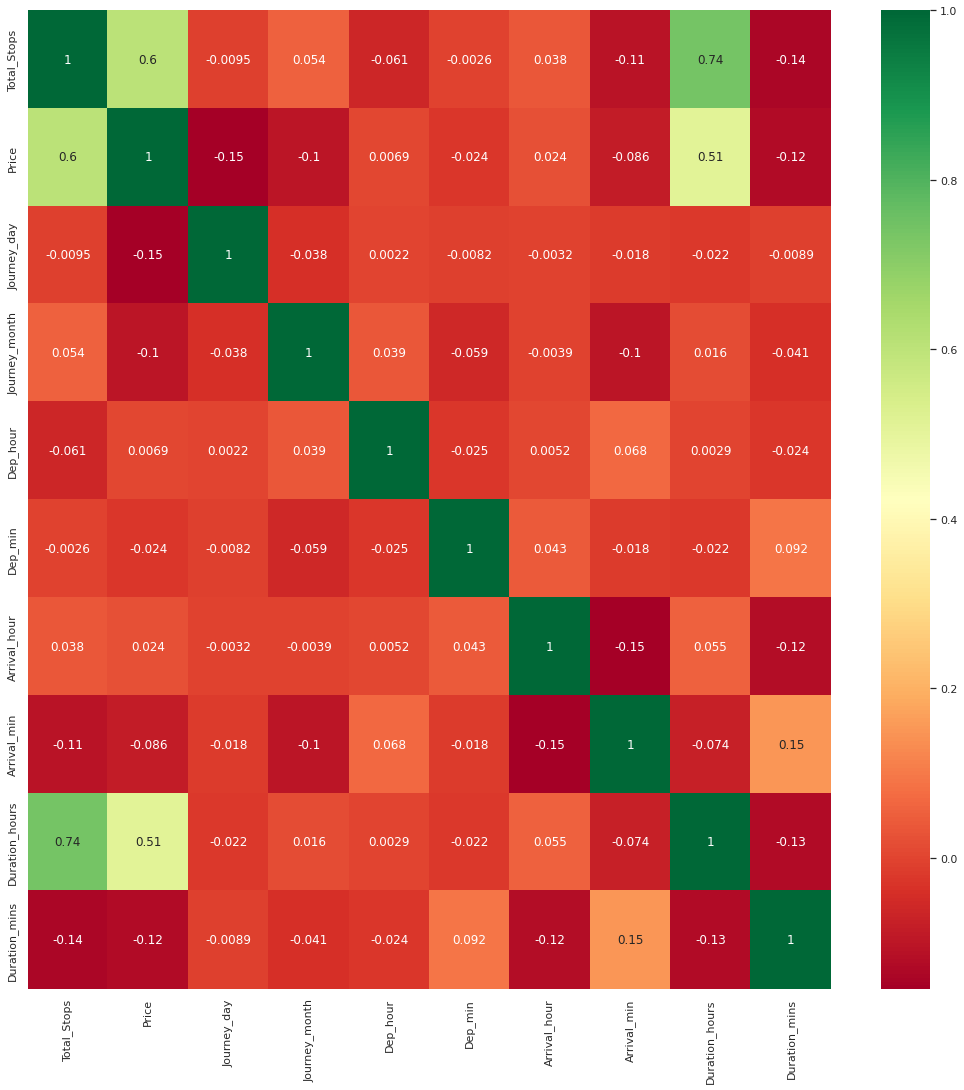

In [114]:
# heatmaps helps in understanding of dependant and independant variable

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [115]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [116]:
print(selection.feature_importances_)

[2.38684504e-01 1.42642849e-01 5.79845913e-02 2.45404510e-02
 2.10188240e-02 2.83311911e-02 1.90667018e-02 1.29031329e-01
 1.76157195e-02 9.46730087e-03 1.89146461e-03 1.05524088e-04
 1.82041876e-02 8.42757282e-04 1.77273572e-02 5.53927340e-03
 1.34840961e-01 4.59052265e-03 6.73605723e-02 5.29468923e-05
 6.32750392e-04 9.24091694e-03 7.44269306e-03 1.97951720e-02
 7.19069178e-04 4.83665917e-03 7.85766686e-03 9.93604428e-03]


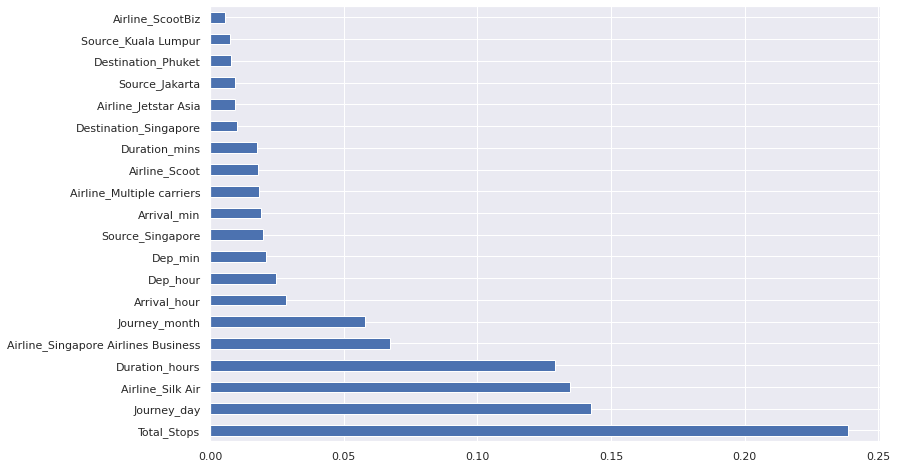

In [117]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


---

# using Random Forest


In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 32)

In [153]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [154]:
y_pred = reg_rf.predict(X_test)

In [155]:
reg_rf.score(X_train, y_train)

0.9572101462748888

In [156]:
reg_rf.score(X_test, y_test)

0.8237275395365297

/home/prashant/anaconda3/envs/aviation/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


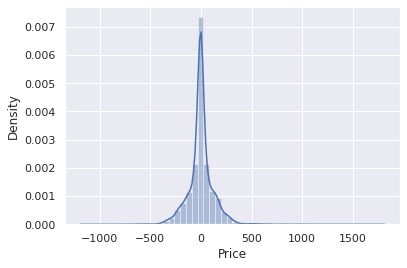

In [157]:
sns.distplot(y_test-y_pred)
plt.show()

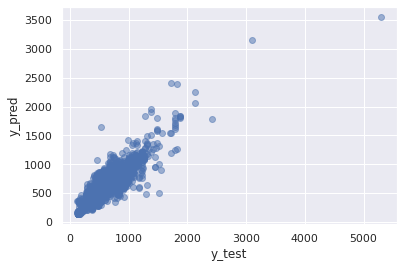

In [158]:

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [159]:
from sklearn import metrics

In [160]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 78.24870782479606
MSE: 15367.403998586404
RMSE: 123.96533385824604


In [161]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.4033476557978005

In [163]:
metrics.r2_score(y_test, y_pred)

0.8237275395365297

---

In [164]:
from sklearn.model_selection import RandomizedSearchCV

In [165]:
#Randomized Search CV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [166]:
# random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [167]:
 #5 fold cross validation,  Need to test for other values too Prashant
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [168]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.7s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [125]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [169]:
prediction = rf_random.predict(X_test)

/home/prashant/anaconda3/envs/aviation/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


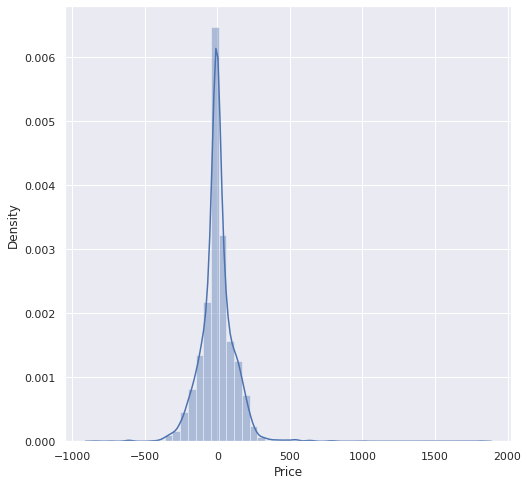

In [170]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

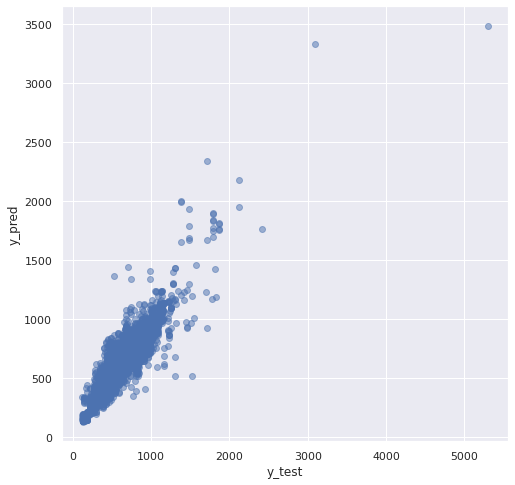

In [171]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [172]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 77.93379783555828
MSE: 13988.508818322818
RMSE: 118.27302658815668


---

## Save the model to reuse it again

In [173]:
import pickle

file = open('aviation_rf.pkl', 'wb')

pickle.dump(reg_rf, file)

In [174]:
model = open('aviation_rf.pkl','rb')
forest = pickle.load(model)

In [175]:
y_prediction = forest.predict(X_test)

In [176]:
metrics.r2_score(y_test, y_prediction)

0.8237275395365297